# **Ingredient to Recipe Search Engine** 

> Takes Image+/Text of ingredients and consumer's mood/taste as input. Outputs recipes dish made out of those ingredients.

'''

`Explain in short how each step will be implemented and everything unique about this project here.`

'''

* [1. Custom Fruits and Vegetables dataset (with Labels)](#1)
* [2. Multi-Label Image Classificaion Model (Transfer Learning)](#2)
* [3. Recipe Generator](#3)
* [4. Ingredient to Recipe Generator](#4)

***
***

## **1. Custom Fruits and Vegetables dataset (with Labels)** <a  id="1"></a>

> We will be creating a Custom Dataset for the purpose of Object Detection.

* Ingredients/ Produce (roots, stems, leaves, flowers, fruits, seeds)
* min images per cooking Ingredient - 100 

***


### **Ingredients** 

`Make a list of most Common type of Ingredients from given 6 classes: `
* `Root Vegetables` 
* `Stem Vegetables` 
* `Leaf Vegetables` 
* `Flower Vegetables` 
* `Seed Vegetables` 
* `Fruits`

In [1]:
## Shorten the list to most common and known fruits and vegetables

root_vegetables = ['Potato', 'Carrot', 'Onion', 'Sweet potato', 'Garlic', 'Ginger', 'Turnip', 'Beetroot', 
                   'Radish', 'Celery root', 'Turmeric', 'Lotus root']

stem_vegetables = ['Bamboo shoots', 'Broccolini', 'Bok choy', 'Artichoke', 'Chicory', 'Water chestnut', 
                   'Lotus stem', 'Nopal cactus', 'Palm heart']

leaf_vegetables = ['Lettuce', 'Spinach', 'Kale', 'Mustard greens', 'Beet greens', 'Cabbage']

flower_vegetables = ['Broccoli', 'Cauliflower', 'Artichoke', 'Hibiscus', 'Rose petals', 'Lavender', 
                     'Dandelion flowers', 'Borage', 'Marigold',  'Snapdragon', 'Sunflower', 'Lilac', 'Saffron']

seed_vegetables = ['Beans', 'Peas', 'Lentils', 'Chickpeas', 'Soybeans', 'Green beans', 'Black beans', 
                   'Kidney beans', 'Lima beans', 'Split peas', 'Black-eyed peas', 'Chia seeds', 'Flax seeds', 
                   'Sesame seeds','Poppy seeds', 'Pumpkin seeds', 'Sunflower seeds', 'Hemp seeds', 'Quinoa']

fruits = ['Apples', 'Bananas', 'Oranges', 'Grapes', 'Strawberries', 'Blueberries', 'Raspberries', 'Blackberries',
          'Pineapple', 'Mangoes', 'Papayas', 'Pears', 'Peaches', 'Plums', 'Cherries', 'Grapefruit', 'Lemons', 
          'Limes', 'Kiwi', 'Cantaloupe', 'Watermelon', 'Honeydew', 'Pomegranate', 'Avocado']

In [3]:
common_ingredients = ['Soybeans', 'Chickpeas', 'Cantaloupe', 'Oranges', 'Pumpkin seeds', 'Saffron', 'Lotus stem', 
               'Peaches', 'Turnip', 'Avocado', 'Beans', 'Kiwi', 'Beet greens', 'Artichoke', 'Split peas', 
               'Pears', 'Poppy seeds', 'Lentils', 'Pomegranate', 'Cabbage', 'Grapefruit', 'Borage', 'Garlic', 
               'Spinach', 'Mangoes', 'Broccoli', 'Limes', 'Lilac', 'Snapdragon', 'Green beans', 'Raspberries', 
               'Kidney beans', 'Chicory', 'Lavender', 'Kale', 'Black beans', 'Sunflower seeds', 'Radish', 
               'Marigold', 'Papayas', 'Sunflower', 'Broccolini', 'Palm heart', 'Onion', 'Rose petals', 'Peas', 
               'Blackberries', 'Nopal cactus', 'Ginger', 'Lemons', 'Chia seeds', 'Quinoa', 'Carrot', 
               'Mustard greens', 'Hibiscus', 'Lotus root', 'Cherries', 'Grapes', 'Beetroot', 'Black eyed peas', 
               'Turmeric', 'Lima beans', 'Blueberries', 'Bamboo shoots', 'Bananas', 'Dandelion flowers', 
               'Sesame seeds', 'Honeydew', 'Strawberries', 'Sweet potato', 'Celery root', 'Lettuce', 
               'Cauliflower', 'Pineapple', 'Hemp seeds', 'Apples', 'Flax seeds', 'Water chestnut', 'Potato', 
               'Plums', 'Bok choy', 'Watermelon']

len(common_ingredients)

82


***

### **Image Collection**

`Collect 100 images for each Ingredient in the given lists.`

**File Structure**

*   .
*   |___ Ingredients
*           |___ Train(90%)
*           |       |___ Potato
*           |       |___ Carrot
*           |       |___ Onion
*           |       |___ .....
*           |
*           |___ Test(10%)


'''

* pip install bing_image_downloader

In [3]:
from bing_image_downloader import downloader

query_string = None
output_dir = "Common_Ingredients"
limit = 200

In [4]:
def download_images(query_string):
    try:
        downloader.download(query_string, 
                            limit=limit, 
                            output_dir=output_dir, 
                            adult_filter_off=True, 
                            force_replace=False, 
                            timeout=60)
    except Exception as e:
        print(f"Error occurred while downloading images: {e}")
        print("Continuing with the remaining images...")

In [5]:
for ingredient in common_ingredients:
    download_images(ingredient)

[%] Downloading Images to c:\Users\Sanskar\AI\AI_Repository\Computer_Vision\Ingredient_to_Recipe_Search_Engine\Ingredients\Turmeric


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://static3.businessinsider.com/image/5b59fa5d959f345d118b457c-1400/turmeric.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.healthyfoodhouse.com/wp-content/uploads/2013/07/turmeric-spice-with-amazing-health-benefits.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0368/4705/files/Benefits-of-turmeric-4.jpg?9424990469680065846
[%] File Downloaded !

[%] Downloading Image #4 from https://learningherbs.com/wp-content/uploads/2017/03/turmeric-1-1030x687.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.herbs-solutions-by-nature.com/blog/wp-content/uploads/2016/10/Turmeric.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://purelifeherbs.com/wp-content/uploads/2015/08/turmeric.j

***

### **Image Labelling**

* `Creating a centralized Repository for Images with Images renamed and their 
classes noted in a .csv file`


In [5]:
import os

common_ingredients_path = "Common_Ingredients"
images_path = "Ingredients_Images"

**Create a folder for all the Images**

In [7]:
if os.path.exists(images_path): pass
else: os.mkdir(images_path)

**Renaming Images** 

In [10]:
for ingredient_name in os.listdir(common_ingredients_path):
    ingredient_path = os.path.join(common_ingredients_path, ingredient_name)

    for index, image_name in enumerate(os.listdir(ingredient_path)):
        old_image_path = os.path.join(ingredient_path, image_name)

        image_renamed = f"{ingredient_name}_{index}.jpg"
        new_image_path = os.path.join(images_path, image_renamed)

        os.rename(old_image_path, new_image_path)

**Labelling Images**

In [ ]:
# perform one hot encoding as shown

In [1]:
import pandas as pd

data = {"Image_Name":[], "Image_Label":[]}
df = pd.DataFrame(data)

df.to_csv("Ingredients_Labels.csv", index=False)

In [2]:
df = pd.read_csv("Ingredients_Labels.csv")

df

Empty DataFrame
Columns: [Image_Name, Image_Label]
Index: []

In [6]:
import os
import re

for image_name in os.listdir(images_path):
    image_label = re.sub("_", " ", image_name)
    image_label = re.sub(r"\d+", "", image_label)
    image_label = re.sub(".jpg", "", image_label)
    image_label = re.sub(".$", "", image_label)

    new_row = pd.DataFrame({"Image_Name": [image_name], "Image_Label": [image_label]})
    df = pd.concat([df, new_row], ignore_index=True)

df.to_csv("Ingredients_Labels.csv", index=False)

In [7]:
df

Image_Name     Image_Label
0              Apples_0.jpg          Apples
1              Apples_1.jpg          Apples
2             Apples_10.jpg          Apples
3             Apples_11.jpg          Apples
4             Apples_12.jpg          Apples
...                     ...             ...
8137  Water_chestnut_95.jpg  Water chestnut
8138  Water_chestnut_96.jpg  Water chestnut
8139  Water_chestnut_97.jpg  Water chestnut
8140  Water_chestnut_98.jpg  Water chestnut
8141  Water_chestnut_99.jpg  Water chestnut

[8142 rows x 2 columns]

In [11]:
df["Image_ID"] = df.index + 1

df

Image_Name     Image_Label  Image_ID
0              Apples_0.jpg          Apples         1
1              Apples_1.jpg          Apples         2
2             Apples_10.jpg          Apples         3
3             Apples_11.jpg          Apples         4
4             Apples_12.jpg          Apples         5
...                     ...             ...       ...
8137  Water_chestnut_95.jpg  Water chestnut      8138
8138  Water_chestnut_96.jpg  Water chestnut      8139
8139  Water_chestnut_97.jpg  Water chestnut      8140
8140  Water_chestnut_98.jpg  Water chestnut      8141
8141  Water_chestnut_99.jpg  Water chestnut      8142

[8142 rows x 3 columns]

**One Hot Encoding**

In [1]:
import pandas as pd 
import os

df = pd.read_csv("Ingredients_Labels.csv")

df

Image_Name     Image_Label  Image_ID
0              Apples_0.jpg          Apples         1
1              Apples_1.jpg          Apples         2
2             Apples_10.jpg          Apples         3
3             Apples_11.jpg          Apples         4
4             Apples_12.jpg          Apples         5
...                     ...             ...       ...
8137  Water_chestnut_95.jpg  Water chestnut      8138
8138  Water_chestnut_96.jpg  Water chestnut      8139
8139  Water_chestnut_97.jpg  Water chestnut      8140
8140  Water_chestnut_98.jpg  Water chestnut      8141
8141  Water_chestnut_99.jpg  Water chestnut      8142

[8142 rows x 3 columns]

In [2]:
common_ingredients = ['Soybeans', 'Chickpeas', 'Cantaloupe', 'Oranges', 'Pumpkin seeds', 'Saffron', 'Lotus stem', 
               'Peaches', 'Turnip', 'Avocado', 'Beans', 'Kiwi', 'Beet greens', 'Artichoke', 'Split peas', 
               'Pears', 'Poppy seeds', 'Lentils', 'Pomegranate', 'Cabbage', 'Grapefruit', 'Borage', 'Garlic', 
               'Spinach', 'Mangoes', 'Broccoli', 'Limes', 'Lilac', 'Snapdragon', 'Green beans', 'Raspberries', 
               'Kidney beans', 'Chicory', 'Lavender', 'Kale', 'Black beans', 'Sunflower seeds', 'Radish', 
               'Marigold', 'Papayas', 'Sunflower', 'Broccolini', 'Palm heart', 'Onion', 'Rose petals', 'Peas', 
               'Blackberries', 'Nopal cactus', 'Ginger', 'Lemons', 'Chia seeds', 'Quinoa', 'Carrot', 
               'Mustard greens', 'Hibiscus', 'Lotus root', 'Cherries', 'Grapes', 'Beetroot', 'Black eyed peas', 
               'Turmeric', 'Lima beans', 'Blueberries', 'Bamboo shoots', 'Bananas', 'Dandelion flowers', 
               'Sesame seeds', 'Honeydew', 'Strawberries', 'Sweet potato', 'Celery root', 'Lettuce', 
               'Cauliflower', 'Pineapple', 'Hemp seeds', 'Apples', 'Flax seeds', 'Water chestnut', 'Potato', 
               'Plums', 'Bok choy', 'Watermelon']

In [5]:
for i in range(len(common_ingredients)):
    df[common_ingredients[i]] = ""

df

Image_Name     Image_Label  Image_ID Soybeans Chickpeas  \
0              Apples_0.jpg          Apples         1                      
1              Apples_1.jpg          Apples         2                      
2             Apples_10.jpg          Apples         3                      
3             Apples_11.jpg          Apples         4                      
4             Apples_12.jpg          Apples         5                      
...                     ...             ...       ...      ...       ...   
8137  Water_chestnut_95.jpg  Water chestnut      8138                      
8138  Water_chestnut_96.jpg  Water chestnut      8139                      
8139  Water_chestnut_97.jpg  Water chestnut      8140                      
8140  Water_chestnut_98.jpg  Water chestnut      8141                      
8141  Water_chestnut_99.jpg  Water chestnut      8142                      

     Cantaloupe Oranges Pumpkin seeds Saffron Lotus stem  ... Cauliflower  \
0                                                         ...               
1                                                         ...               
2                                                         ...               
3                                                         ...               
4                                                         ...               
...         ...     ...           ...     ...        ...  ...         ...   
8137                                                      ...               
8138                                                      ...               
8139                                                      ...               
8140                                                      ...               
8141                                                      ...               

     Pineapple Hemp seeds Apples Flax seeds Water chestnut Potato Plums  \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
...        ...        ...    ...        ...            ...    ...   ...   
8137                                                                      
8138                                                                      
8139                                                                      
8140                                                                      
8141                                                                      

     Bok choy Watermelon  
0                         
1                         
2                         
3                         
4                         
...       ...        ...  
8137                      
8138                      
8139                      
8140                      
8141                      

[8142 rows x 85 columns]

In [9]:
for i in range(len(df)):
    label = df.loc[i, "Image_Label"]
    
    df.loc[i, label] = 1

df

Image_Name     Image_Label  Image_ID Soybeans Chickpeas  \
0              Apples_0.jpg          Apples         1                      
1              Apples_1.jpg          Apples         2                      
2             Apples_10.jpg          Apples         3                      
3             Apples_11.jpg          Apples         4                      
4             Apples_12.jpg          Apples         5                      
...                     ...             ...       ...      ...       ...   
8137  Water_chestnut_95.jpg  Water chestnut      8138                      
8138  Water_chestnut_96.jpg  Water chestnut      8139                      
8139  Water_chestnut_97.jpg  Water chestnut      8140                      
8140  Water_chestnut_98.jpg  Water chestnut      8141                      
8141  Water_chestnut_99.jpg  Water chestnut      8142                      

     Cantaloupe Oranges Pumpkin seeds Saffron Lotus stem  ... Cauliflower  \
0                                                         ...               
1                                                         ...               
2                                                         ...               
3                                                         ...               
4                                                         ...               
...         ...     ...           ...     ...        ...  ...         ...   
8137                                                      ...               
8138                                                      ...               
8139                                                      ...               
8140                                                      ...               
8141                                                      ...               

     Pineapple Hemp seeds Apples Flax seeds Water chestnut Potato Plums  \
0                              1                                          
1                              1                                          
2                              1                                          
3                              1                                          
4                              1                                          
...        ...        ...    ...        ...            ...    ...   ...   
8137                                                     1                
8138                                                     1                
8139                                                     1                
8140                                                     1                
8141                                                     1                

     Bok choy Watermelon  
0                         
1                         
2                         
3                         
4                         
...       ...        ...  
8137                      
8138                      
8139                      
8140                      
8141                      

[8142 rows x 85 columns]

In [18]:
df.replace("", 0, inplace=True)

df.to_csv("Ingredients_Labels.csv", index=False)
df

Image_Name     Image_Label  Image_ID  Soybeans  Chickpeas  \
0              Apples_0.jpg          Apples         1         0          0   
1              Apples_1.jpg          Apples         2         0          0   
2             Apples_10.jpg          Apples         3         0          0   
3             Apples_11.jpg          Apples         4         0          0   
4             Apples_12.jpg          Apples         5         0          0   
...                     ...             ...       ...       ...        ...   
8137  Water_chestnut_95.jpg  Water chestnut      8138         0          0   
8138  Water_chestnut_96.jpg  Water chestnut      8139         0          0   
8139  Water_chestnut_97.jpg  Water chestnut      8140         0          0   
8140  Water_chestnut_98.jpg  Water chestnut      8141         0          0   
8141  Water_chestnut_99.jpg  Water chestnut      8142         0          0   

      Cantaloupe  Oranges  Pumpkin seeds  Saffron  Lotus stem  ...  \
0              0        0              0        0           0  ...   
1              0        0              0        0           0  ...   
2              0        0              0        0           0  ...   
3              0        0              0        0           0  ...   
4              0        0              0        0           0  ...   
...          ...      ...            ...      ...         ...  ...   
8137           0        0              0        0           0  ...   
8138           0        0              0        0           0  ...   
8139           0        0              0        0           0  ...   
8140           0        0              0        0           0  ...   
8141           0        0              0        0           0  ...   

      Cauliflower  Pineapple  Hemp seeds  Apples  Flax seeds  Water chestnut  \
0               0          0           0       1           0               0   
1               0          0           0       1           0               0   
2               0          0           0       1           0               0   
3               0          0           0       1           0               0   
4               0          0           0       1           0               0   
...           ...        ...         ...     ...         ...             ...   
8137            0          0           0       0           0               1   
8138            0          0           0       0           0               1   
8139            0          0           0       0           0               1   
8140            0          0           0       0           0               1   
8141            0          0           0       0           0               1   

      Potato  Plums  Bok choy  Watermelon  
0          0      0         0           0  
1          0      0         0           0  
2          0      0         0           0  
3          0      0         0           0  
4          0      0         0           0  
...      ...    ...       ...         ...  
8137       0      0         0           0  
8138       0      0         0           0  
8139       0      0         0           0  
8140       0      0         0           0  
8141       0      0         0           0  

[8142 rows x 85 columns]

***
***

## **2. Multi-Label Image Classificaion Model (Transfer Learning)** <a id="2"></a>

* `Transfer Learning with VGG-16`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv("Ingredients_Labels.csv")

train.head()

Image_Name Image_Label  Image_ID  Soybeans  Chickpeas  Cantaloupe  \
0   Apples_0.jpg      Apples         1         0          0           0   
1   Apples_1.jpg      Apples         2         0          0           0   
2  Apples_10.jpg      Apples         3         0          0           0   
3  Apples_11.jpg      Apples         4         0          0           0   
4  Apples_12.jpg      Apples         5         0          0           0   

   Oranges  Pumpkin seeds  Saffron  Lotus stem  ...  Cauliflower  Pineapple  \
0        0              0        0           0  ...            0          0   
1        0              0        0           0  ...            0          0   
2        0              0        0           0  ...            0          0   
3        0              0        0           0  ...            0          0   
4        0              0        0           0  ...            0          0   

   Hemp seeds  Apples  Flax seeds  Water chestnut  Potato  Plums  Bok choy  \
0           0       1           0               0       0      0         0   
1           0       1           0               0       0      0         0   
2           0       1           0               0       0      0         0   
3           0       1           0               0       0      0         0   
4           0       1           0               0       0      0         0   

   Watermelon  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 85 columns]

In [3]:
train.columns

Index(['Image_Name', 'Image_Label', 'Image_ID', 'Soybeans', 'Chickpeas',
       'Cantaloupe', 'Oranges', 'Pumpkin seeds', 'Saffron', 'Lotus stem',
       'Peaches', 'Turnip', 'Avocado', 'Beans', 'Kiwi', 'Beet greens',
       'Artichoke', 'Split peas', 'Pears', 'Poppy seeds', 'Lentils',
       'Pomegranate', 'Cabbage', 'Grapefruit', 'Borage', 'Garlic', 'Spinach',
       'Mangoes', 'Broccoli', 'Limes', 'Lilac', 'Snapdragon', 'Green beans',
       'Raspberries', 'Kidney beans', 'Chicory', 'Lavender', 'Kale',
       'Black beans', 'Sunflower seeds', 'Radish', 'Marigold', 'Papayas',
       'Sunflower', 'Broccolini', 'Palm heart', 'Onion', 'Rose petals', 'Peas',
       'Blackberries', 'Nopal cactus', 'Ginger', 'Lemons', 'Chia seeds',
       'Quinoa', 'Carrot', 'Mustard greens', 'Hibiscus', 'Lotus root',
       'Cherries', 'Grapes', 'Beetroot', 'Black eyed peas', 'Turmeric',
       'Lima beans', 'Blueberries', 'Bamboo shoots', 'Bananas',
       'Dandelion flowers', 'Sesame seeds', 'Honeydew',

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img("Ingredients_Images/"+train["Image_Name"][i], target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  5%|▌         | 423/8142 [00:08<01:54, 67.59it/s]c:\Users\Sanskar\anaconda3\envs\ComputerVision\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 48%|████▊     | 3899/8142 [01:19<01:49, 38.87it/s] c:\Users\Sanskar\anaconda3\envs\ComputerVision\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 8142/8142 [02:40<00:00, 50.76it/s] 


In [5]:
X.shape

(8142, 400, 400, 3)

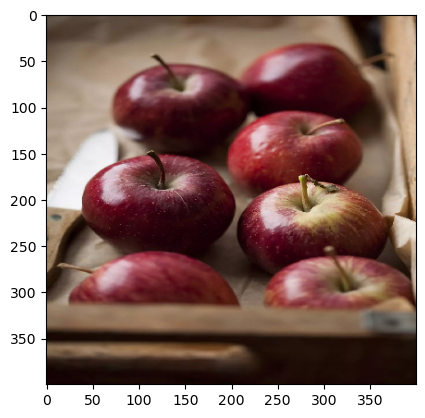

In [6]:
plt.imshow(X[2])

In [7]:
train["Image_Label"][2]

'Apples'

In [8]:
y = np.array(train.drop(["Image_Name", "Image_Label", "Image_ID"], axis=1))
y.shape

(8142, 82)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

**Transfer Learning Model with VGG-16**

In [10]:
vgg_base=VGG16(weights="imagenet", include_top=False, input_shape=(400,400,3))
for layer in vgg_base.layers:
    layer.trainable=False

In [11]:
model = Sequential() 

model.add(vgg_base)
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation="relu", padding="same")) 
model.add(MaxPooling2D((2,2), padding="same")) 
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation="relu", padding="same")) 
model.add(MaxPooling2D((2,2), padding="same")) 
model.add(Dropout(0.25))

model.add(Flatten())  
model.add(Dense(128, activation="relu")) 
model.add(Dropout(0.5)) 
model.add(Dense(82, activation="sigmoid")) 

In [12]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 12, 12, 512)       14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 512)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 32)          147488    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          1

In [13]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a directory to save the best model
checkpoint_dir="./Best_Models"
if not os.path.exists(checkpoint_dir):
    os.mkdir(checkpoint_dir)

In [14]:
checkpoint_filepath=os.path.join(checkpoint_dir, "best_model.h5")
model_checkpoint_callback=ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

In [15]:
from tensorflow.keras import optimizers 

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

In [16]:
from tensorflow.keras.utils import Sequence
import numpy as np

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

In [17]:
train_gen = DataGenerator(X_train, y_train, 32)
test_gen = DataGenerator(X_test, y_test, 32)

In [19]:
history = model.fit(train_gen, epochs=30, validation_data=test_gen)

Epoch 1/10
229/229 [==============================] - 30s 132ms/step - loss: 0.0487 - accuracy: 0.2264 - val_loss: 0.0453 - val_accuracy: 0.2761
Epoch 2/10
229/229 [==============================] - 31s 134ms/step - loss: 0.0475 - accuracy: 0.2454 - val_loss: 0.0445 - val_accuracy: 0.3018
Epoch 3/10
229/229 [==============================] - 31s 134ms/step - loss: 0.0459 - accuracy: 0.2708 - val_loss: 0.0442 - val_accuracy: 0.3018
Epoch 4/10
229/229 [==============================] - 31s 135ms/step - loss: 0.0452 - accuracy: 0.2896 - val_loss: 0.0424 - val_accuracy: 0.3252
Epoch 5/10
229/229 [==============================] - 31s 136ms/step - loss: 0.0445 - accuracy: 0.2982 - val_loss: 0.0431 - val_accuracy: 0.3117
Epoch 6/10
229/229 [==============================] - 31s 136ms/step - loss: 0.0431 - accuracy: 0.3151 - val_loss: 0.0416 - val_accuracy: 0.3350
Epoch 7/10
229/229 [==============================] - 31s 137ms/step - loss: 0.0426 - accuracy: 0.3263 - val_loss: 0.0414 - val_ac

In [23]:
img = image.load_img('./Ingredients_Images/Apples_1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Cantaloupe (0.266)
Hemp seeds (0.207)
Ginger (0.186)


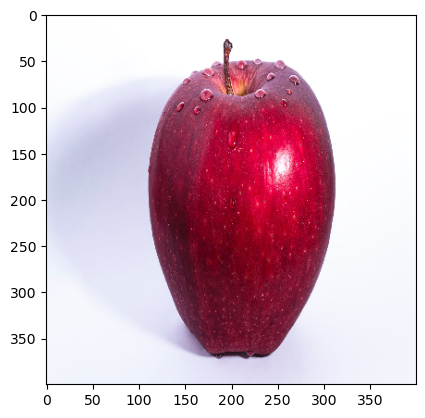

In [24]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
# Find ways to converge model faster